In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_bokeh

In [3]:
pandas_bokeh.output_notebook()

Loading BokehJS ...

# Data

In [4]:
original_path = "original.xlsx"
xls = pd.ExcelFile(original_path)

In [5]:
GRD_sheet = pd.read_excel(xls, sheet_name="grd", header=0, index_col=None)
Hosp_sheet = pd.read_excel(xls, "hospitals", header=0, index_col=None)
Info_sheet = pd.read_excel(xls, "historic_information", header=0, index_col=None)
C1_sheet =  pd.read_excel(xls, "class_1", header=0, index_col=None)

In [6]:
GRD_sheet.columns.values

array(['ID GRD', 'Nombre GRD',
       'Costo resolución en Clínica Privada [MM$]'], dtype=object)

In [9]:
GRD_sheet.head(3)

,ID GRD,Nombre GRD,Costo resolución en Clínica Privada [MM$]
0,GRD1,Coronario,7.917
1,GRD2,Hepático,3.417
2,GRD3,Respiratorio,2.915


In [7]:
Hosp_sheet.columns.values

array(['Nombre Servicio de Salud', 'Nombre Establecimiento',
       'Área Cuidados Intensivos Adultos',
       'Área Cuidados Intermedios Adulto', 'Total Camas Críticas',
       'Máxima cantidad de camas a aumetar',
       'Costo de instalar una cama [MM$]',
       'Costo de operación anual de una cama [MM$]',
       'Costo diario GRD1 [MM$]', 'Costo diario GRD2 [MM$]',
       'Costo diario GRD3 [MM$]', 'Costo diario GRD4 [MM$]',
       'Costo diario GRD5 [MM$]', 'Costo diario GRD6 [MM$]',
       'Costo diario GRD7 [MM$]', 'Costo diario GRD8 [MM$]',
       'Costo diario GRD9 [MM$]', 'Costo diario GRD10 [MM$]'],
      dtype=object)

In [10]:
Hosp_sheet.head(3)

,Nombre Servicio de Salud,Nombre Establecimiento,Área Cuidados Intensivos Adultos,Área Cuidados Intermedios Adulto,Total Camas Críticas,Máxima cantidad de camas a aumetar,Costo de instalar una cama [MM$],Costo de operación anual de una cama [MM$],Costo diario GRD1 [MM$],Costo diario GRD2 [MM$],Costo diario GRD3 [MM$],Costo diario GRD4 [MM$],Costo diario GRD5 [MM$],Costo diario GRD6 [MM$],Costo diario GRD7 [MM$],Costo diario GRD8 [MM$],Costo diario GRD9 [MM$],Costo diario GRD10 [MM$]
0,Metropolitano Norte ...,Complejo Hospitalario San José,11,33,44,10,1407,47.2,0.593,0.509,0.367,0.492,0.524,0.405,0.571,0.474,0.498,0.305
1,Metropolitano Occidente ...,Hospital Adalberto Steeger (Talagante),6,11,17,5,1263,62.1,0.493,0.357,0.429,0.382,0.469,0.386,0.543,0.362,0.564,0.333
2,Metropolitano Occidente ...,Hospital Dr. Félix Bulnes Cerda,3,6,9,5,1310,65.9,0.580,0.325,0.375,0.409,0.561,0.362,0.328,0.314,0.536,0.436


In [8]:
Info_sheet.columns.values

array(['Número de llegada', 'Hospital al que llega', 'GRD',
       'Día de llegada', 'Día de salida', 'Estadia'], dtype=object)

In [11]:
Info_sheet.head(5)

,Número de llegada,Hospital al que llega,GRD,Día de llegada,Día de salida,Estadia
0,1,Instituto Traumatológico Dr. Teodoro Gebauer,GRD3,1,4,3
1,2,Hospital Clínico San Borja-Arriarán,GRD7,1,5,4
2,3,Hospital Dr. Luis Tisné B.,GRD7,1,5,4
3,4,Hospital Dr. Exequiel González Cortés,GRD10,1,11,10
4,5,Hospital Barros Luco Trudeau,GRD6,1,6,5


# Practices

In [31]:
dfp2 = Info_sheet.loc[(Info_sheet['Hospital al que llega'] == 'Hospital Del Salvador')] 
dfp2g = dfp2[['Día de llegada', 'Número de llegada']].groupby('Día de llegada').count()
np.round(dfp2g.tail(5).mean())

Número de llegada    12.0
dtype: float64

In [32]:
dfp3 = Info_sheet
dfp3g = dfp3[['Día de llegada', 'Número de llegada']].groupby('Día de llegada').count()
np.round(dfp3g.tail(5).mean())

Número de llegada    149.0
dtype: float64

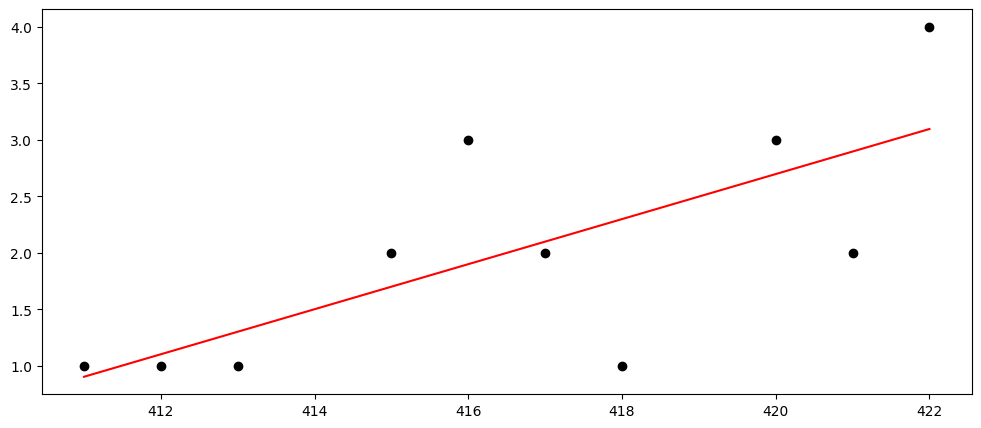

In [60]:
dfp4 = Info_sheet.loc[(Info_sheet['Hospital al que llega'] == 'Hospital Del Salvador') & (Info_sheet['GRD'] == 'GRD9')]
dfp4g = dfp4[['Día de llegada', 'Número de llegada']].groupby('Día de llegada').count().reset_index().tail(10)
x = dfp4g[['Día de llegada']]
y = dfp4g[['Número de llegada']]
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming x and y are defined and are numpy arrays or similar data structures
regressor = LinearRegression().fit(x, y)

# Create a plot
plt.figure(figsize=(12, 5))
plt.scatter(x, y, color='black')  # Plot the actual data points

# Plot the regression line
plt.plot(x, regressor.predict(x), color='red')  # Predict y values and plot them

# Show the plot
plt.show()

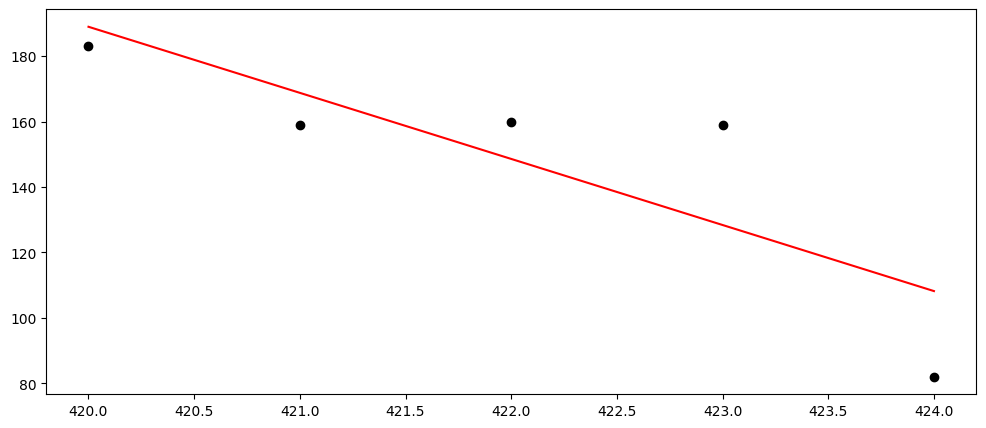

In [65]:
dfp5 = Info_sheet
dfp5g = dfp5[['Día de llegada', 'Número de llegada']].groupby('Día de llegada').count().reset_index().tail(5)
x5 = dfp5g[['Día de llegada']]
y5 = dfp5g[['Número de llegada']]
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Assuming x and y are defined and are numpy arrays or similar data structures
regressor = LinearRegression().fit(x5, y5)

# Create a plot
plt.figure(figsize=(12, 5))
plt.scatter(x5, y5, color='black')  # Plot the actual data points

# Plot the regression line
plt.plot(x5, regressor.predict(x5), color='red')  # Predict y values and plot them

# Show the plot
plt.show()

Coeficiente de determinación R^2: -6.165657944634133


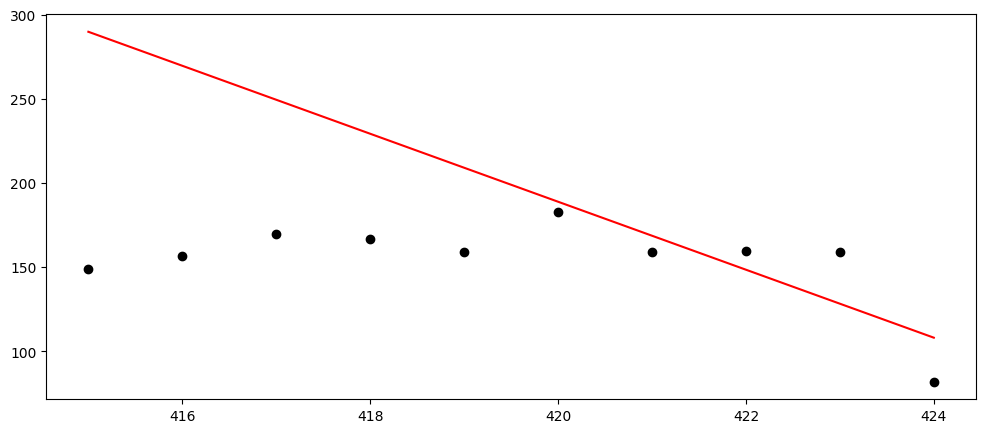

In [66]:
# Calcular el coeficiente de determinación R^2
r2 = regressor.score(x, y)
print(f"Coeficiente de determinación R^2: {r2}")

# Crear un gráfico
plt.figure(figsize=(12, 5))
plt.scatter(x, y, color='black')  # Puntos de datos reales
plt.plot(x, regressor.predict(x), color='red')  # Línea de regresión
plt.show()